## Car Price Prediction Project

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

#### Problem Statement:
We have to make a model to predict the selling price of used cars.

#### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset:

In [2]:
df = pd.read_csv('Car24_final.csv')

df

,Brand,Model,History,Transmission_Type,Fuel_Type,Purchase_Year,Location,KM_Driven,Owner,Price
0,Maruti,Swift,Non-Accidental,MANUAL,Diesel,2015,Mumbai,30736.0,1st Owner,477099
1,Honda,Amaze,Non-Accidental,MANUAL,Petrol,2014,Mumbai,35265.0,1st Owner,426699
2,Maruti,Alto K10,Non-Accidental,MANUAL,Petrol,2016,Mumbai,29393.0,1st Owner,306799
3,Volkswagen,Ameo,Non-Accidental,MANUAL,Petrol,2016,Mumbai,11414.0,2nd Owner,476399
4,Maruti,Swift,Non-Accidental,MANUAL,Petrol,2017,Mumbai,21485.0,1st Owner,527899
...,...,...,...,...,...,...,...,...,...,...
2457,Maruti,Wagon R 1.0,Non-Accidental,MANUAL,Petrol,2011,Bangalore,85650.0,1st Owner,278299
2458,Hyundai,i10,Non-Accidental,AUTOMATIC,Petrol,2011,Bangalore,58231.0,2nd Owner,337699
2459,Maruti,Swift,Non-Accidental,MANUAL,Petrol,2018,Bangalore,65030.0,1st Owner,631899
2460,Maruti,Ritz,Non-Accidental,MANUAL,Petrol,2010,Bangalore,98931.0,2nd Owner,311099


In [3]:
# Checking for the shape of the dataset:

df.shape

(2462, 10)

- The dataset contains 2462 rows and 10 columns including the target column.

- Price is the target column.

In [4]:
# Let's check if there is any duplicate data is present in our dataset.

df.duplicated().sum()

81

In [5]:
# Removing the duplicated data

df.drop_duplicates(inplace=True, ignore_index=True)

In [6]:
# Checking for the shape of the dataset again after removing the duplicated data

df.shape

(2381, 10)

- Our final dataset contains 2381 rows and 10 columns.

In [7]:
# Checking for the columns of the dataset

df.columns

Index(['Brand', 'Model', 'History', 'Transmission_Type', 'Fuel_Type',
       'Purchase_Year', 'Location', 'KM_Driven', 'Owner', 'Price'],
      dtype='object')

- The dataset contains following columns:

    - <b>Brand:</b> Shows the brand name of the car
    - <b>Model:</b> Shows the model of the car
    - <b>History:</b> Shows the accidental record history of the car.
    - <b>Transmission_Type:</b> Transmission type of the car (Manual or Automatic).
    - <b>Fuel_Type:</b> Fuel used in the car.
    - <b>Purchase_Year:</b> The year in which the car was first purchased.
    - <b>Location:</b> Shows location of the seller.
    - <b>KM_Driven:</b> Total Kms driven so far.
    - <b>Owner:</b> Number of owners.
    - <b>Price:</b> This is the target column, the price of the car.

In [8]:
# Let's check for the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              2381 non-null   object 
 1   Model              2381 non-null   object 
 2   History            2122 non-null   object 
 3   Transmission_Type  2381 non-null   object 
 4   Fuel_Type          2135 non-null   object 
 5   Purchase_Year      2381 non-null   int64  
 6   Location           2381 non-null   object 
 7   KM_Driven          2135 non-null   float64
 8   Owner              2379 non-null   object 
 9   Price              2381 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 186.1+ KB


- There are missing values (null values) in the dataset.

- Our dataset contains object, integer and float data type.

#### Let's now check for the missing values in the dataset:

In [9]:
df.isnull().sum()

Brand                  0
Model                  0
History              259
Transmission_Type      0
Fuel_Type            246
Purchase_Year          0
Location               0
KM_Driven            246
Owner                  2
Price                  0
dtype: int64

#### Handling the missing values:

<AxesSubplot:ylabel='History'>

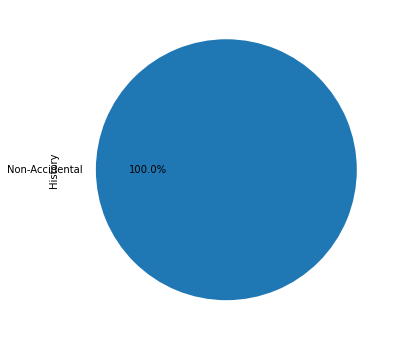

In [10]:
# History column

plt.figure(figsize=[6,6])
df['History'].value_counts().plot.pie(autopct='%0.1f%%')

- As all the cars are non-accidental, so it is better to remove the column as it will not contribute to our model building.

In [11]:
# Removing the History column

df = df.drop('History',axis = 1)

<AxesSubplot:ylabel='Fuel_Type'>

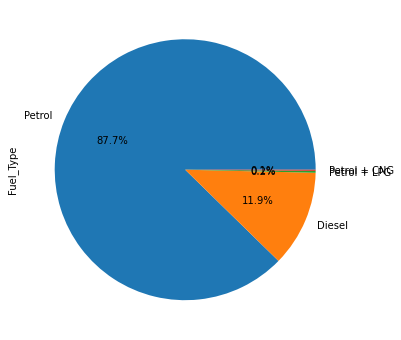

In [12]:
# Fuel_Type column

plt.figure(figsize=[6,6])
df['Fuel_Type'].value_counts().plot.pie(autopct='%0.1f%%')

- Maximum cars uses petrol fuel. So, we're replacing the missing values with Petrol.


In [13]:
df['Fuel_Type'] = df['Fuel_Type'].fillna('Petrol')

Maximum kms driven =  180289.0
Minimum kms driven =  199.0
Median of kms driven =  31999.0
Mean of kms driven =  35699.37283372365 



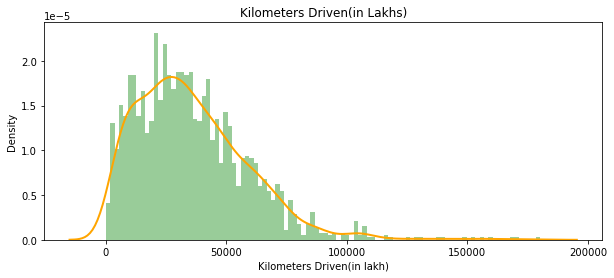

In [14]:
# KM_Driven

print("Maximum kms driven = ",max(df['KM_Driven']))
print("Minimum kms driven = ",min(df['KM_Driven']))
print("Median of kms driven = ",df['KM_Driven'].median())
print("Mean of kms driven = ",df['KM_Driven'].mean(),"\n")

plt.figure(figsize=(10,4))
sns.distplot(df['KM_Driven'],hist=True,kde=True,bins=100,
             kde_kws={"color":'orange',"lw":2,"label":"KDE"},
             hist_kws={"color":'g',"linewidth":2.5,"histtype": "bar","label":"hist"},  
             axlabel="Kilometers Driven(in lakh)",color='red')
plt.title("Kilometers Driven(in Lakhs)")
plt.show()

The minimum Km driven by the car is 199 kms and maximum is 180289 kms, this shows that the dataset is not uniform, since there is huge difference in minimum and maximum kms driven. Also, the mean is greater than median, which shows there is outliers and right-skewness in the km driven column.

In [15]:
# Replacing the missing values with the median

df['KM_Driven'] = df['KM_Driven'].fillna(df['KM_Driven'].median())

<AxesSubplot:ylabel='Owner'>

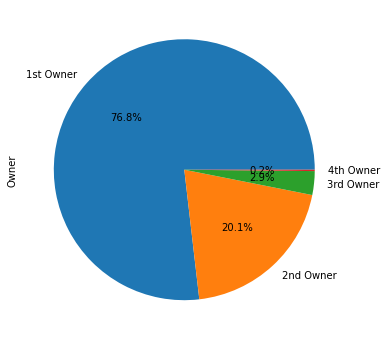

In [16]:
# Owner feature column

plt.figure(figsize=[6,6])
df['Owner'].value_counts().plot.pie(autopct='%0.1f%%')

- The pie graph shows that approx 77% cars are having single owner. So, we'll replace the missing values with 1st Owner.

In [17]:
# Replacing the missing values

df['Owner'] = df['Owner'].fillna('1st Owner')

No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values


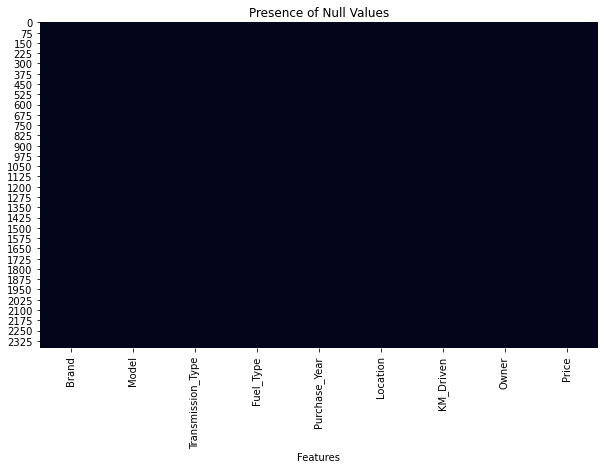

In [18]:
# Checking for the null values again

for i in df:
    if df[i].isnull().sum()>0:
        print("{} -> having null values = {}".format(i,df[i].isnull().sum()))
    else:
        print('No null values')
    
#Plotting Heatmap
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull(), cbar=False)
plt.title('Presence of Null Values')
plt.xlabel('Features')
plt.show()

In [19]:
# Function for bivariate analysis using barplot to find the average sale price based on different features

def analysis(ind_feature, ):
    
    # Grouping SalePrice and one other feature
    group_values=df.groupby(ind_feature)['Price'].mean()
    plt.figure(figsize=(9,3.9))
    
    # Sorting values in descending order & then plotting graph
    group_values.sort_values(ascending=False).plot.bar(edgecolor='r')
    plt.title("Average SalePrice based on {}".format(ind_feature),fontsize=16,color='black',pad=12)
    plt.xlabel(ind_feature,labelpad=15)
    plt.ylabel("SalePrice (in ₹Lakhs)",labelpad=15)
    plt.show()

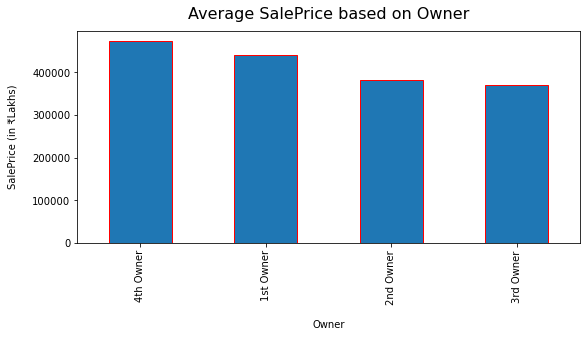

In [20]:
# Checking the average price based on Owner

analysis('Owner')

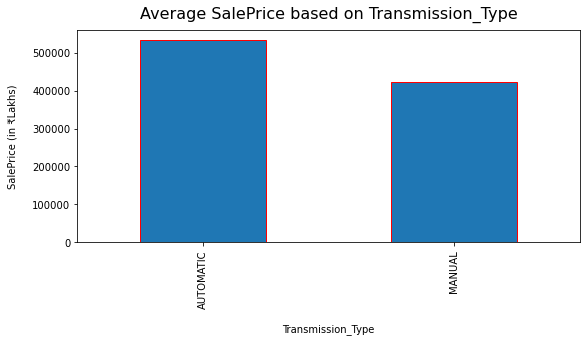

In [21]:
# Checking average price based on the transmission type of the car

analysis('Transmission_Type')

- The above graph clearly shows that the car having automatic transmission system are more expensive than the car having manual transmission system. 

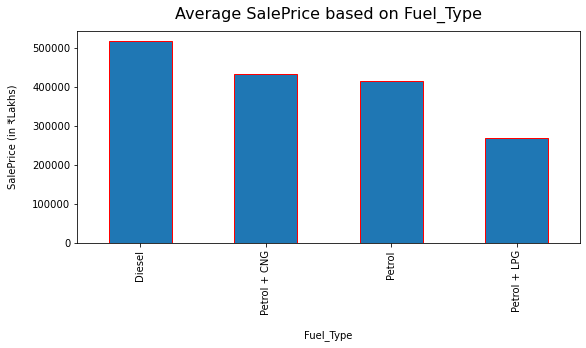

In [22]:
# Checking the average price based on fuel type

analysis('Fuel_Type')

- Fuel type is also a main feature to decide the price of the cars. As the cars which uses diesel to operate are having more sale price. This is because the diesel cars are costier than petrol cars.

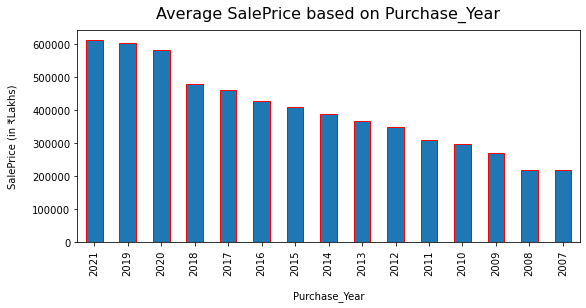

In [23]:
# Let's check the impact of  purchase year on the average price

analysis('Purchase_Year')

- The above graph clearly shows that the cars which are brought is recent years are having more price. This shows that in the resale market the demand for recent cars are more.

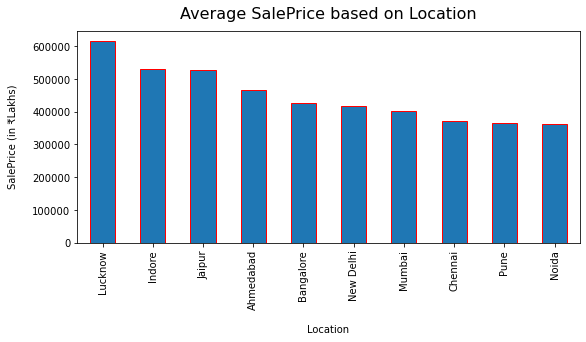

In [24]:
# Let's check the impact of location on the car prices

analysis('Location')

- The above graph shows that the average price of the cars which are listed in tier 2 or tier 3 cities are more than the cars from the tier 1 cities. We can draw a story from this that in the big cities or tier 2 cities people changes their car more than the persons from the small or tier 2/3 cities. We can also draw a conclusion that in the big cities the number of persons having cars is more.

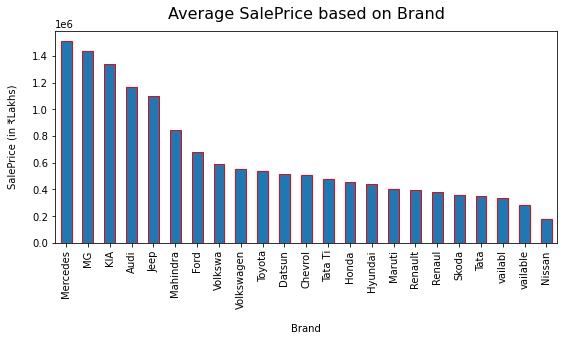

In [25]:
# Let's check for the average price based on brand

analysis('Brand')

- We can see that the premium brands like Mercedes, MG, KIA, Audi are having higher price. The brand like Nissan, Tata are having least price.

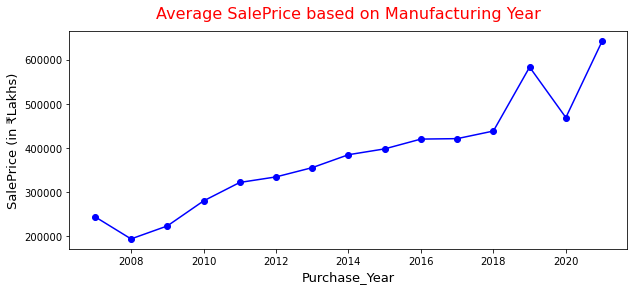

In [26]:
# SalePrice analysis based on years

plt.figure(figsize=(10,4))
plt.plot(df.groupby("Purchase_Year")["Price"].median(),marker="o",color='blue')
plt.title("Average SalePrice based on Manufacturing Year",color='red',fontsize=16,pad=13,loc='center')
plt.xlabel("Purchase_Year",fontsize=13,color='black')
plt.ylabel("SalePrice (in ₹Lakhs)",color="black",fontsize=13)
plt.show()

- The above graph shows that after 2008 there is continuos growth in the price of the car, but in the year 2020 there is fall in the car price. This may be because in the year 2020 the COVID-19 hit the world which impacted the economy very badly. But after 2020 we can see that the price of the cars are increasing this shows the economy is recovering now.

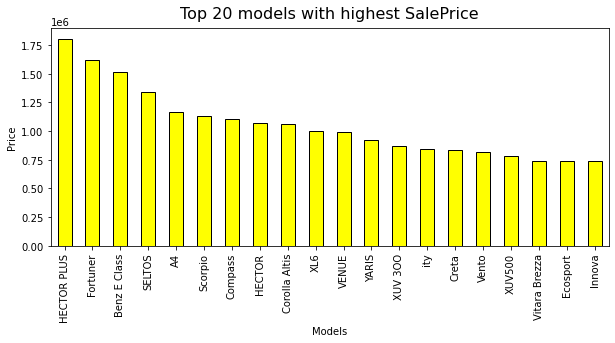

In [27]:
# Top 20 model with highest Price

plt.figure(figsize=(10,4))
df.groupby("Model")['Price'].mean().sort_values(ascending=False)[:20].plot.bar(color='yellow',edgecolor='black')
plt.title("Top 20 models with highest SalePrice",fontsize=16,pad=10,color='black')
plt.xlabel("Models")
plt.ylabel("Price")
plt.show()

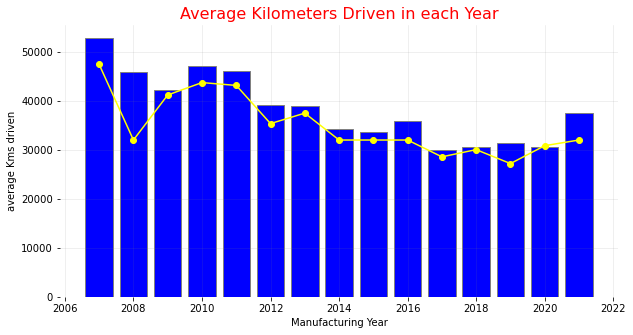

In [28]:
# Barplot on average kilometer driven in each year of car

fig, ax = plt.subplots(figsize =(10,5))
a=df.groupby("Purchase_Year")['KM_Driven'].mean()
ax.bar(a.index,a.values,color='blue',edgecolor='grey')
ax.plot(df.groupby("Purchase_Year")["KM_Driven"].median(),marker="o",color='yellow')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-', linewidth=0.6,
        alpha=0.2)
# Setting  title and lables
ax.set_title("Average Kilometers Driven in each Year",fontsize=16,loc='center',color='red')
ax.set_xlabel("Manufacturing Year")
ax.set_ylabel("average Kms driven")
plt.show()

#### Label encoding the categorical features:

In [29]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

variables = ['Brand', 'Model', 'Transmission_Type', 'Fuel_Type', 'Location', 'Owner']

for v in variables:
    df[v] = LE.fit_transform(df[v])

In [30]:
# Checking for the dataset after Labelencoding.

df.head()

,Brand,Model,Transmission_Type,Fuel_Type,Purchase_Year,Location,KM_Driven,Owner,Price
0,10,62,1,0,2015,6,30736.0,0,477099
1,4,7,1,1,2014,6,35265.0,0,426699
2,10,6,1,1,2016,6,29393.0,0,306799
3,20,8,1,1,2016,6,11414.0,1,476399
4,10,62,1,1,2017,6,21485.0,0,527899


#### Checking for the data distribution among all the columns:

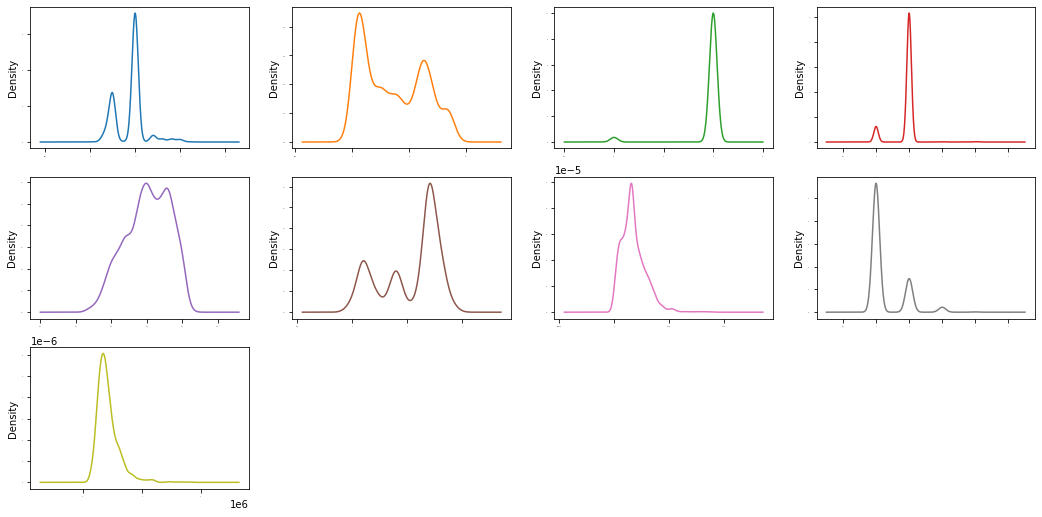

In [31]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

- The above graphs show the presence of skewness in the dataset.

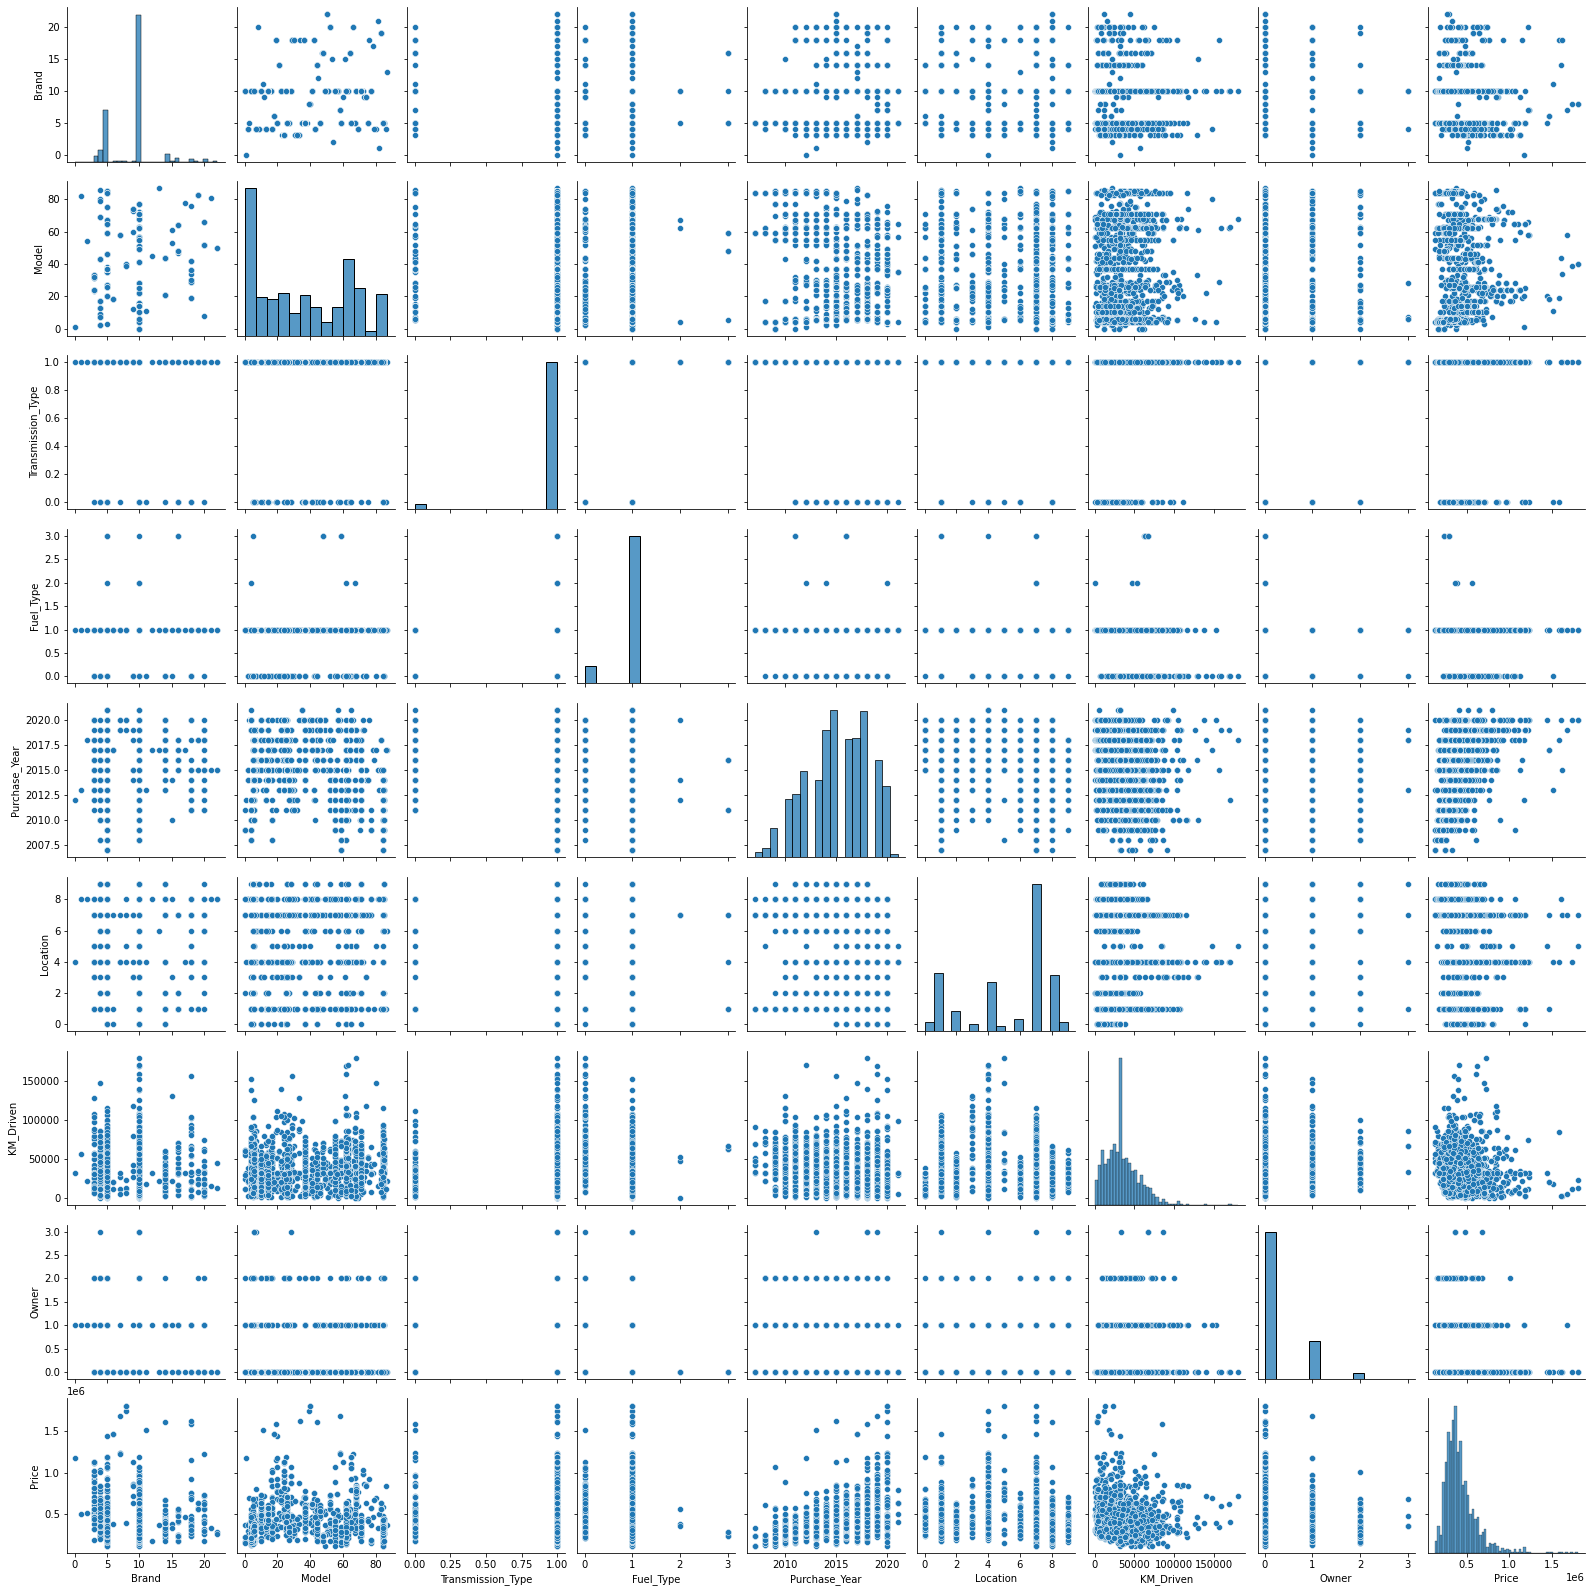

In [32]:
#Plotting pairplot

sns.pairplot(df)
plt.show()

#### Checking for the Statistical Summary:

In [33]:
df.describe()

,Brand,Model,Transmission_Type,Fuel_Type,Purchase_Year,Location,KM_Driven,Owner,Price
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03
mean,8.890802,35.825283,0.965561,0.898362,2015.164637,5.287694,35317.057959,0.264175,4.270714e+05
std,3.286310,27.110506,0.182393,0.326301,3.064534,2.663473,22148.358648,0.513201,1.921741e+05
min,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000,199.000000,0.000000,1.234990e+05
25%,5.000000,6.000000,1.000000,1.000000,2013.000000,3.000000,20380.000000,0.000000,3.043990e+05
50%,10.000000,30.000000,1.000000,1.000000,2015.000000,7.000000,31999.000000,0.000000,3.830990e+05
75%,10.000000,62.000000,1.000000,1.000000,2018.000000,7.000000,46441.000000,0.000000,4.995990e+05
max,22.000000,87.000000,1.000000,3.000000,2021.000000,9.000000,180289.000000,3.000000,1.805499e+06


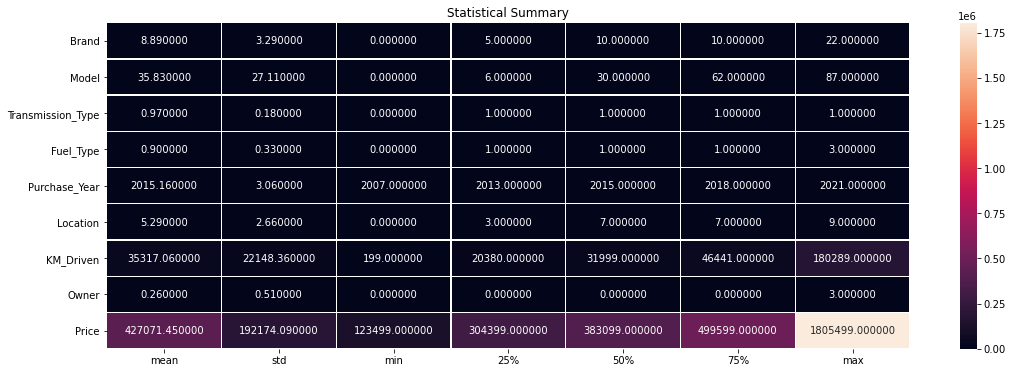

In [34]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[18,6])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

#### Checking for the Correlation of the variables:

In [35]:
df.corr()

,Brand,Model,Transmission_Type,Fuel_Type,Purchase_Year,Location,KM_Driven,Owner,Price
Brand,1.000000,-0.065338,-0.012586,-0.005652,0.146848,0.011847,-0.051381,-0.074319,-0.102987
Model,-0.065338,1.000000,-0.008525,-0.115764,-0.268193,-0.002748,0.142553,-0.005469,0.086147
Transmission_Type,-0.012586,-0.008525,1.000000,-0.037660,-0.060512,0.142355,0.039535,-0.010493,-0.103140
Fuel_Type,-0.005652,-0.115764,-0.037660,1.000000,-0.005529,-0.116212,-0.298692,0.009861,-0.166470
Purchase_Year,0.146848,-0.268193,-0.060512,-0.005529,1.000000,-0.096404,-0.212264,-0.152697,0.457274
Location,0.011847,-0.002748,0.142355,-0.116212,-0.096404,1.000000,-0.046203,-0.020583,-0.111520
KM_Driven,-0.051381,0.142553,0.039535,-0.298692,-0.212264,-0.046203,1.000000,0.160148,-0.124501
Owner,-0.074319,-0.005469,-0.010493,0.009861,-0.152697,-0.020583,0.160148,1.000000,-0.123059
Price,-0.102987,0.086147,-0.103140,-0.166470,0.457274,-0.111520,-0.124501,-0.123059,1.000000


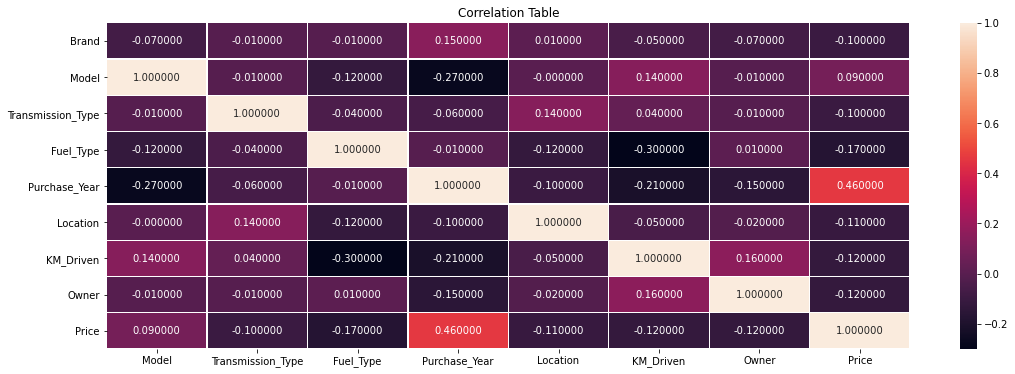

In [36]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[18,6])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

- Purchase year shows very strong bond with the target column. (46%)

#### Outliers Analysis:

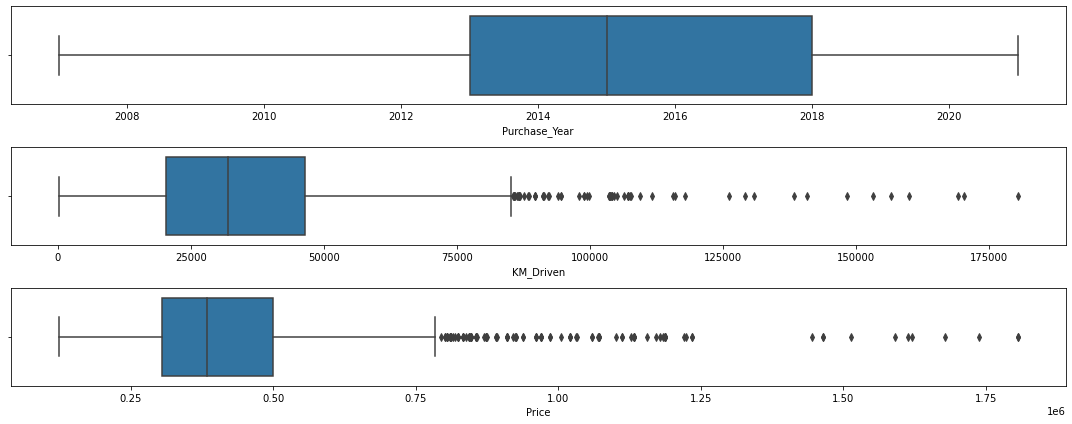

In [37]:
# Checking outliers for the numerical features only

fig, axs = plt.subplots(3, figsize = (15,6))
plt1 = sns.boxplot(df['Purchase_Year'], ax = axs[0], orient='v')
plt2 = sns.boxplot(df['KM_Driven'], ax = axs[1], orient='v')
plt3 = sns.boxplot(df['Price'], ax=axs[2], orient='v')

plt.tight_layout()

- The boxplot says that, there is outliers in KM driven and Price columns.

#### Data Cleaning:

In [38]:
# checking outliers using zscore method
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[3.37591617e-01, 9.65685209e-01, 1.88858893e-01, ...,
        2.06878547e-01, 5.14866505e-01, 2.60378812e-01],
       [1.48854766e+00, 1.06347474e+00, 1.88858893e-01, ...,
        2.35091435e-03, 5.14866505e-01, 1.93848606e-03],
       [3.37591617e-01, 1.10036856e+00, 1.88858893e-01, ...,
        2.67527832e-01, 5.14866505e-01, 6.25983011e-01],
       ...,
       [3.37591617e-01, 9.65685209e-01, 1.88858893e-01, ...,
        1.34182330e+00, 5.14866505e-01, 1.06606766e+00],
       [3.37591617e-01, 7.07428488e-01, 1.88858893e-01, ...,
        2.87277743e+00, 1.43409558e+00, 6.03602765e-01],
       [1.18419112e+00, 8.55003757e-01, 1.88858893e-01, ...,
        1.44858049e+00, 5.14866505e-01, 6.91562335e-01]])

In [39]:
# Whose zsore value greater then threshold value
np.where(z>3)

(array([   3,   12,   13,   17,   36,   37,   42,   46,   55,   65,   70,
          72,   72,   80,   81,   91,  116,  129,  129,  146,  166,  192,
         200,  211,  211,  231,  249,  256,  259,  259,  260,  260,  263,
         264,  265,  267,  273,  275,  275,  281,  285,  287,  289,  290,
         292,  296,  300,  301,  302,  304,  305,  306,  307,  308,  308,
         309,  310,  311,  312,  325,  334,  356,  358,  359,  369,  377,
         378,  387,  391,  396,  404,  411,  412,  413,  433,  451,  469,
         552,  586,  586,  626,  639,  652,  659,  675,  684,  686,  702,
         707,  708,  713,  729,  734,  747,  755,  781,  784,  841,  847,
         851,  852,  855,  859,  874,  876,  880,  889,  894,  896,  908,
         911,  912,  913,  916,  919,  924,  930, 1032, 1043, 1056, 1066,
        1072, 1074, 1085, 1096, 1193, 1234, 1264, 1264, 1279, 1296, 1304,
        1322, 1347, 1351, 1353, 1357, 1362, 1380, 1423, 1424, 1450, 1452,
        1454, 1472, 1502, 1503, 1504, 

In [40]:
# Let's give new name to dataset after outliers removal
df_new=df[(z<3).all(axis=1)]
df_new

,Brand,Model,Transmission_Type,Fuel_Type,Purchase_Year,Location,KM_Driven,Owner,Price
0,10,62,1,0,2015,6,30736.0,0,477099
1,4,7,1,1,2014,6,35265.0,0,426699
2,10,6,1,1,2016,6,29393.0,0,306799
4,10,62,1,1,2017,6,21485.0,0,527899
5,13,87,1,1,2017,6,22341.0,0,377499
...,...,...,...,...,...,...,...,...,...
2373,10,6,1,1,2014,1,34729.0,0,299899
2374,10,62,1,1,2016,1,70966.0,0,501199
2376,10,71,1,1,2011,1,85650.0,0,278299
2378,10,62,1,1,2018,1,65030.0,0,631899


In [41]:
# Checking percentage loss of data
print("Percentage loss of data is {}%".format(round((df.shape[0]-df_new.shape[0])/df.shape[0]*100,2)))

Percentage loss of data is 11.13%


#### Checking for skewness:

In [42]:
# Splitting the dataset into independent and dependent variables:

x = df_new.drop(["Price"], axis=1) #dropping the categorical and target columns.
y = df_new["Price"]

In [43]:
x.skew()

Brand               -0.050770
Model                0.314241
Transmission_Type    0.000000
Fuel_Type           -2.588587
Purchase_Year       -0.310240
Location            -0.728968
KM_Driven            0.589565
Owner                1.436801
dtype: float64

- Columns Fuel_Type, Location, KM_Driven, Owner contains skewness.

In [44]:
# Removing the skewness using the power transform

from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.41726829,  0.98560993,  0.        , ...,  0.12489667,
        -0.04551072, -0.51311167],
       [-1.62968251, -1.09355798,  0.        , ...,  0.12489667,
         0.18285546, -0.51311167],
       [ 0.41726829, -1.18910328,  0.        , ...,  0.12489667,
        -0.11601592, -0.51311167],
       ...,
       [ 0.41726829,  1.16923036,  0.        , ..., -1.58416295,
         2.16951445, -0.51311167],
       [ 0.41726829,  0.98560993,  0.        , ..., -1.58416295,
         1.44393941, -0.51311167],
       [ 0.41726829,  0.82958686,  0.        , ..., -1.58416295,
         2.59652236,  1.94889352]])

#### Standard Scaler:

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.41726829,  0.98560993,  0.        , ...,  0.12489667,
        -0.04551072, -0.51311167],
       [-1.62968251, -1.09355798,  0.        , ...,  0.12489667,
         0.18285546, -0.51311167],
       [ 0.41726829, -1.18910328,  0.        , ...,  0.12489667,
        -0.11601592, -0.51311167],
       ...,
       [ 0.41726829,  1.16923036,  0.        , ..., -1.58416295,
         2.16951445, -0.51311167],
       [ 0.41726829,  0.98560993,  0.        , ..., -1.58416295,
         1.44393941, -0.51311167],
       [ 0.41726829,  0.82958686,  0.        , ..., -1.58416295,
         2.59652236,  1.94889352]])

#### Model Building:

In [46]:
# Let's find best random state

max_r_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    R2_score = r2_score(y_test,y_pred)
    
    if R2_score > max_r_score:
        max_r_score = R2_score
        final_random_state = i
print("Max r2 score corresponding to ",final_random_state,"is ",max_r_score,".")

Max r2 score corresponding to  92 is  0.4571270889740152 .


#### Splitting data for training and testing

In [47]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=final_random_state)

In [48]:
# defining all the models 
LR = LinearRegression()
RR = Ridge()
DR = DecisionTreeRegressor()
RF = RandomForestRegressor()
KNN = KNeighborsRegressor()
ADR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()


In [49]:
# Ceate empty list to store result of each algo

Method = []       # algo used 
R2_Score = []     # R2 score of algorithm
MAE = []         # mean absolute error 
MSE = []         # mean squared error 
RMSE = []        # root mean squared error 
CVScore = []     # mean of cross val score 
Std = []         # standard deviation in cross val 


def r2score(model):
    print(30*" ",model,10*" ")
    Method.append(str(model))
    
    # Training score
    model.fit(x_train,y_train)
    print("\nTraining Score {} %".format(round(model.score(x_train,y_train)*100,3)))
    y_pred = model.predict(x_test)
    
    # R2 score value
    r2 = r2_score(y_test,y_pred)
    print("\nCoeff. of determination = %.2f"%r2)
    R2_Score.append(round(r2,2))
    
    # Mean absolute error
    mae=mean_absolute_error(y_test,y_pred)
    print("Mean absolute error = ",mae)
    MAE.append(mae)
    
    # Mean squared error 
    mse=mean_squared_error(y_test,y_pred)
    print("Mean Squared error = ",mse)
    MSE.append(mse)
    
    # Root mean squared error
    print("Root means sq. error = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    # cross validation
    cvs=cross_val_score(model,x,y,cv=6,scoring='r2')
    print("\nCross val score = ",round(cvs.mean()*100,3),"%")
    CVScore.append(round(cvs.mean()*100,3))
    
    # Standard deviation
    print("Standard deviation = %.2f"%cvs.std())
    Std.append(cvs.std())
    print("\n",30*"*-*")

In [50]:
r2score(LR)

                               LinearRegression()           

Training Score 36.624 %

Coeff. of determination = 0.46
Mean absolute error =  85294.23732079027
Mean Squared error =  13001812478.073555
Root means sq. error =  114025.49047504051

Cross val score =  25.313 %
Standard deviation = 0.32

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [51]:
r2score(RR)

                               Ridge()           

Training Score 36.624 %

Coeff. of determination = 0.46
Mean absolute error =  85300.9511764645
Mean Squared error =  13003522527.884205
Root means sq. error =  114032.98877028615

Cross val score =  25.325 %
Standard deviation = 0.32

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [52]:
r2score(DR)

                               DecisionTreeRegressor()           

Training Score 99.011 %

Coeff. of determination = 0.62
Mean absolute error =  56685.916824196596
Mean Squared error =  8981685401.701323
Root means sq. error =  94771.75423986475

Cross val score =  26.816 %
Standard deviation = 0.56

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [53]:
r2score(RF)

                               RandomForestRegressor()           

Training Score 95.329 %

Coeff. of determination = 0.73
Mean absolute error =  51848.865343415244
Mean Squared error =  6362945617.39073
Root means sq. error =  79768.07392303471

Cross val score =  48.005 %
Standard deviation = 0.52

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [54]:
r2score(KNN)

                               KNeighborsRegressor()           

Training Score 64.697 %

Coeff. of determination = 0.50
Mean absolute error =  76592.17391304347
Mean Squared error =  11949660412.098299
Root means sq. error =  109314.50229543333

Cross val score =  25.766 %
Standard deviation = 0.30

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [55]:
r2score(ADR)

                               AdaBoostRegressor()           

Training Score 41.945 %

Coeff. of determination = 0.44
Mean absolute error =  92709.92914260918
Mean Squared error =  13390719537.685532
Root means sq. error =  115718.27659313602

Cross val score =  24.278 %
Standard deviation = 0.42

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [56]:
r2score(GBR)

                               GradientBoostingRegressor()           

Training Score 76.541 %

Coeff. of determination = 0.70
Mean absolute error =  59010.40176267949
Mean Squared error =  7067059223.580753
Root means sq. error =  84065.80293782218

Cross val score =  48.545 %
Standard deviation = 0.41

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


#### Evaluation of Algorithms:

In [57]:
# Table view of result of each metrix from above algorithms
evaluations = pd.DataFrame({"Model":Method,"R2 Score":R2_Score,"MAE":MAE,"MSE":MSE,
                                 "RMSE":RMSE,"CV Score":CVScore,"Stnd_dev":Std})
evaluations

,Model,R2 Score,MAE,MSE,RMSE,CV Score,Stnd_dev
0,LinearRegression(),0.46,85294.237321,1.300181e+10,114025.490475,25.313,0.321115
1,Ridge(),0.46,85300.951176,1.300352e+10,114032.988770,25.325,0.320863
2,DecisionTreeRegressor(),0.62,56685.916824,8.981685e+09,94771.754240,26.816,0.561469
3,RandomForestRegressor(),0.73,51848.865343,6.362946e+09,79768.073923,48.005,0.520202
4,KNeighborsRegressor(),0.50,76592.173913,1.194966e+10,109314.502295,25.766,0.298190
5,AdaBoostRegressor(),0.44,92709.929143,1.339072e+10,115718.276593,24.278,0.417614
6,GradientBoostingRegressor(),0.70,59010.401763,7.067059e+09,84065.802938,48.545,0.413240


- As per our above analysis we can say that Random Forest Regressor is performing best among all other models.

#### Hyperparameter Tunning

##### Hyper parameter tuning for RandomForestRegressor

In [58]:
# setting parameters

params={'n_estimators' : [100, 200, 300, 1000]
            ,'bootstrap': [True],
            'criterion':['mse','mae'],
           'max_depth': [80, 90, 100,None],
           'max_features': ['auto','sqrt'],
            'min_samples_leaf' : [1, 2, 4],
            'min_samples_split' : [8, 10, 12]
           }

In [59]:
# Using RandomizedSearchCV for hyperparmeter tunning
from sklearn.model_selection import RandomizedSearchCV

RF_rdcv = RandomizedSearchCV(RF, param_distributions=params,
                      scoring='r2', n_jobs=-1, verbose=2, cv=5)

RF_rdcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   scoring='r2', verbose=2)

In [60]:
# finding best parameters and best score
print(RF_rdcv.best_params_)
print(RF_rdcv.best_score_)

{'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mse', 'bootstrap': True}
0.7064580671721449


In [61]:
# Let's now try best parameters for RandomForestRegressor

RFR = RandomForestRegressor(n_estimators= 1000, min_samples_split=8, min_samples_leaf= 1,
                            max_features= 'auto', max_depth= None, criterion= 'mse', 
                            bootstrap= True, random_state=final_random_state)
RFR.fit(x_train,y_train)
print("Training score = %.2f"%RFR.score(x_train,y_train))
RFR_pred = RFR.predict(x_test)
print("Coefficient of determination = %.2f "%r2_score(y_test,RFR_pred))
print("\nMean Absolute error = %.3f"%mean_absolute_error(y_test,RFR_pred))
print("Means Squared error = %.3f"%mean_squared_error(y_test,RFR_pred))
cv=cross_val_score(RFR, x,y, cv=5 ,scoring='r2')
print("\nCross vald. score = %.2f"%cv.mean())
print("Standard deviation = %.2f"%cv.std())

Training score = 0.90
Coefficient of determination = 0.73 

Mean Absolute error = 53136.336
Means Squared error = 6569896353.048

Cross vald. score = 0.53
Standard deviation = 0.25


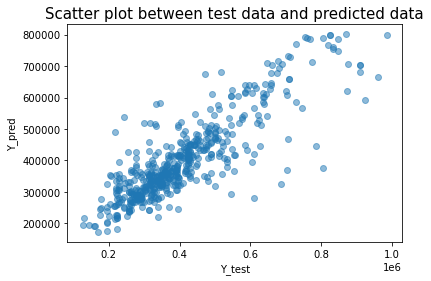

In [62]:
# Let's plot the graph of predicted and actual data
plt.scatter(y_test,RFR_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

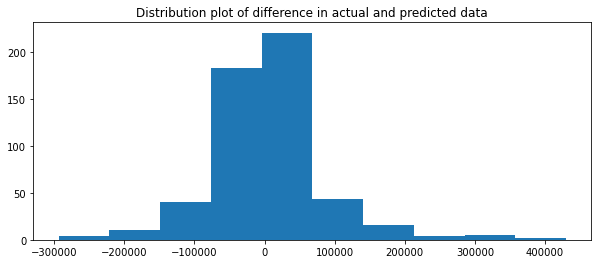

In [63]:
# Let's plot distribution plot
plt.figure(figsize=[10,4])
plt.hist(y_test - RFR_pred)
plt.title("Distribution plot of difference in actual and predicted data")
plt.show()

#### Hyper parameter tunning for GradientBooostingRegressor

In [64]:
# setting parameters dictionary
gr_params={'n_estimators' : [20, 50, 70, 100, 200, 1000]
            ,'learning_rate' : [1, 0.5, 0.2, 0.1, 0.05,0.02, .01, 0.001],
            'criterion':['mse','mae'],
           'max_depth':range(5,16,2),
           'max_features': ['auto','sqrt'],
            'min_samples_split':range(200,1001,200)
           }

In [65]:
# Using RandomzedSearchCV for hypertunning GradientBoostingRegression

GBR_cv = RandomizedSearchCV(GBR, param_distributions=gr_params,
                      scoring='r2', n_jobs=-1, verbose=2, cv=5)

GBR_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'learning_rate': [1, 0.5, 0.2, 0.1,
                                                          0.05, 0.02, 0.01,
                                                          0.001],
                                        'max_depth': range(5, 16, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': range(200, 1001, 200),
                                        'n_estimators': [20, 50, 70, 100, 200,
                                                         1000]},
                   scoring='r2', verbose=2)

In [66]:
# finding best parameters and best score

print(GBR_cv.best_params_)
print(GBR_cv.best_score_)

{'n_estimators': 200, 'min_samples_split': 200, 'max_features': 'auto', 'max_depth': 9, 'learning_rate': 0.05, 'criterion': 'mse'}
0.7033109205947607


In [67]:
# Let's now try best parameter on GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators= 200, min_samples_split=200, learning_rate=0.05,
                            max_features= 'auto', max_depth= 9, criterion= 'mse')
GBR.fit(x_train,y_train)
print("Training score = %.2f"%GBR.score(x_train,y_train))
GBR_pred = GBR.predict(x_test)
print("Coef. of determination = %.2f "%r2_score(y_test,GBR_pred))
print("\nMean Absolute error = %.3f"%mean_absolute_error(y_test,GBR_pred))
print("Means Squared error = %.3f"%mean_squared_error(y_test,GBR_pred))
cv=cross_val_score(GBR, x,y, cv=5 ,scoring='r2')
print("\nCross vald. score = %.2f"%cv.mean())
print("Standard deviation = %.2f"%cv.std())

Training score = 0.84
Coef. of determination = 0.71 

Mean Absolute error = 56384.947
Means Squared error = 6917180977.477

Cross vald. score = 0.53
Standard deviation = 0.20


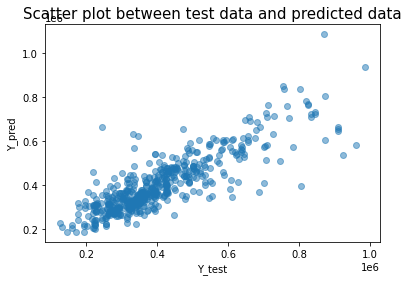

In [68]:
# Let's plot the graph of predicted and actual data
plt.scatter(y_test,GBR_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

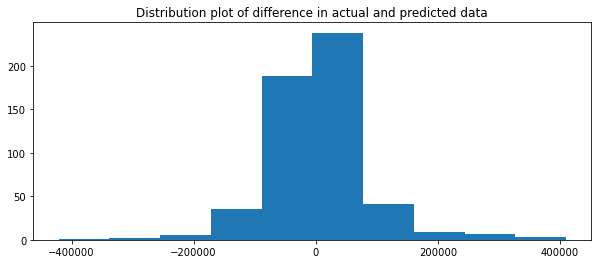

In [69]:
# Distribution plot
plt.figure(figsize=[10,4])
plt.hist(y_test - GBR_pred)
plt.title("Distribution plot of difference in actual and predicted data")
plt.show()

- <b>After testing various algorithms and hypertunnig the best two algorithms we find that both RandomForestRegressor and GradientBoostingRegressor are giving better results but we are finalising the GradientBoostingRegressor algorithm for our model as there is minimum difference in coefficient of determination and cross validation score and also less variance in result in the higher Price.</b>

- <b>The selected model gives coefficient of determination value =0.71 with minimum mean absolute error of 56384.947 and cross validation score 0.53 with a least standard deviation of 0.20.

### Finalising & Saving the model

In [70]:
import pickle
filename = 'car_price.pkl'
pickle.dump(GBR, open(filename, 'wb'))

### Conclusion:

In [71]:
a = np.array(y_test)
predicted = np.array(GBR.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,444999,477769.790286
1,580699,559719.555736
2,439799,460196.687521
3,271199,289605.258848
4,447099,265608.888347
...,...,...
524,399499,360772.690211
525,364799,425159.528872
526,345899,316246.797989
527,481799,474083.477372
